## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_metadata = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_metadata, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(mouse_study_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean2 = mouse_study_df.loc[mouse_study_df['Mouse ID']!='g989']

In [6]:
clean_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean2['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
mean_group = clean_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_group = clean_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_group = clean_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_group = clean_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_group = clean_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
group_df = ({"Mean Tumor Volume": mean_group,
             "Median Tumor Volume": median_group,
             "Variance Tumor Volume": var_group,
             "Standard Deviation Tumor Volume": std_group,
             "SEM Tumor Volume": sem_group
            })


In [10]:
group_df = pd.DataFrame(group_df)
group_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_study.groupby('Drug Regimen').agg(['mean', 'median','var','std','sem'])['Tumor Volume (mm3)']
agg_df 


/var/folders/3k/6xzjh8pd05z3pk2qlf50c_b80000gn/T/ipykernel_55153/3001907072.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_df = clean_study.groupby('Drug Regimen').agg(['mean', 'median','var','std','sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints of Mice Per Drug'}, xlabel='Drug Regimen', ylabel='Mice Tested'>

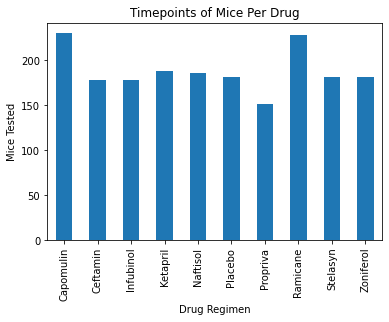

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_tp = clean_study.groupby('Drug Regimen').count()['Timepoint']

total_tp.plot(kind="bar",title="Timepoints of Mice Per Drug", xlabel="Drug Regimen", ylabel="Mice Tested")

<BarContainer object of 10 artists>

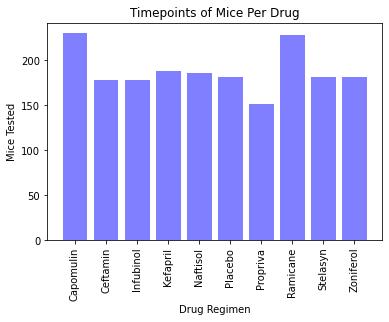

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis=clean_study.groupby('Drug Regimen').count()['Timepoint']
x_axis=np.arange(len(clean_study.groupby('Drug Regimen')))
drugs=['Capomulin','Ceftamin','Infubinol','Kefapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drugs, rotation=90)
plt.title("Timepoints of Mice Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.bar(x_axis,y_axis,color="b", alpha=0.5, align="center")

<AxesSubplot:ylabel='sex'>

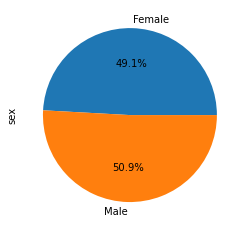

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_study.groupby('Sex').count()['Timepoint']
gender_df.plot(kind="pie",autopct="%1.1f%%",ylabel="sex")

([<matplotlib.patches.Wedge at 0x7fcee611a430>,
 [Text(0.030277540496140565, 1.099583225836728, 'Female'),
  Text(-0.030277540496141186, -1.099583225836728, 'Male')],
 [Text(0.01651502208880394, 0.5997726686382152, '49.1%'),
  Text(-0.01651502208880428, -0.5997726686382152, '50.9%')])

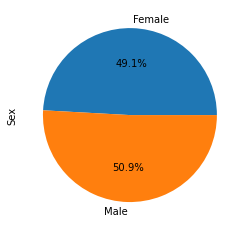

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
# The values of each section of the pie chart
sizes = clean_study.groupby('Sex').count()['Timepoint']
plt.ylabel("Sex")
plt.pie(sizes, labels = labels,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

<AxesSubplot:ylabel='Final Tumor Volume (mm3)'>

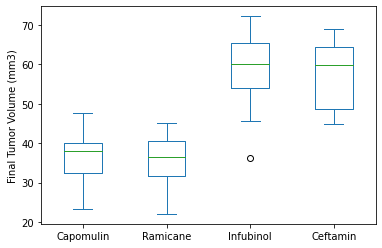

In [16]:
final_tp = clean_study.groupby(clean_study['Mouse ID']).max()['Timepoint']
final_volume_df= pd.merge(clean_study, final_tp, on=["Timepoint",'Mouse ID'], how="right").set_index('Mouse ID')
# Put treatments into a list for for loop (and later for plot labels)
treat_dict = {}
volume_list=[]

# clean_study.loc[clean_study['Drug Regimen']=='Capomulin']
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for treatment in treatments:
    treat_dict[treatment]= final_volume_df.loc[final_volume_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    volume_list= final_volume_df.loc[final_volume_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']


treatment_df = pd.DataFrame(treat_dict)
treatment_df.plot.box(xlabel="Drug Regimen", ylabel="Final Tumor Volume (mm3)")


In [17]:
Capomulin_quartiles = treatment_df['Capomulin'].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_midq = Capomulin_quartiles[0.5]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq


Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)

Ramicane_quartiles = treatment_df['Ramicane'].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_midq = Ramicane_quartiles[0.5]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq


Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)

Infubinol_quartiles = treatment_df['Infubinol'].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_midq = Infubinol_quartiles[0.5]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq


Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

Ceftamin_quartiles = treatment_df['Ceftamin'].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_midq = Ceftamin_quartiles[0.5]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq


Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

In [18]:
print(f"Capomulin's mid quartile is {Capomulin_midq}, iqr is {Capomulin_iqr}, lower bound is {Capomulin_lower_bound},upper bound is {Capomulin_upper_bound} ")
print(f"Ramicane's mid quartile is {Ramicane_midq}, iqr is {Ramicane_iqr}, lower bound is {Ramicane_lower_bound},upper bound is {Ramicane_upper_bound} ")
print(f"Infubinol's mid quartile is {Infubinol_midq}, iqr is {Infubinol_iqr}, lower bound is {Infubinol_lower_bound},upper bound is {Infubinol_upper_bound} ")
print(f"Ceftamin's mid quartile is {Ceftamin_midq}, iqr is {Ceftamin_iqr}, lower bound is {Ceftamin_lower_bound},upper bound is {Ceftamin_upper_bound} ")

Capomulin's mid quartile is 38.1251644, iqr is 7.781863460000004, lower bound is 20.70456164999999,upper bound is 51.83201549 
Ramicane's mid quartile is 36.56165229, iqr is 9.098536719999998, lower bound is 17.912664470000003,upper bound is 54.30681135 
Infubinol's mid quartile is 60.16518046, iqr is 11.477135160000003, lower bound is 36.83290494999999,upper bound is 82.74144559000001 
Ceftamin's mid quartile is 59.85195552, iqr is 15.577752179999997, lower bound is 25.355449580000002,upper bound is 87.66645829999999 


## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin Treatment of Mouseb128'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

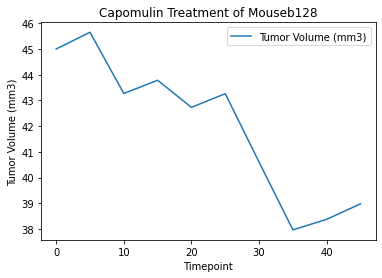

In [19]:
capo_mouse = clean_study.loc[clean_study['Mouse ID']=='b128'].drop(['Mouse ID','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)'],axis=1).set_index('Timepoint')
capo_mouse.plot(kind="line",title="Capomulin Treatment of Mouseb128", xlabel="Timepoint", ylabel="Tumor Volume (mm3)")


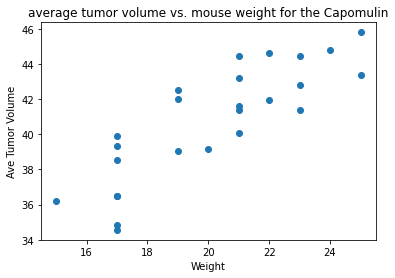

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_weight = clean_study.loc[clean_study['Drug Regimen']=='Capomulin']
# capo_weight.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')
capo_weight_df = pd.DataFrame(capo_weight.groupby('Mouse ID').mean())
# capo_weight_df.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')
X = capo_weight_df.loc[:,'Weight (g)'].values.reshape(-1, 1)  
Y = capo_weight_df.loc[:,'Tumor Volume (mm3)'].values.reshape(-1, 1)  
plt.scatter(X, Y)
plt.title("average tumor volume vs. mouse weight for the Capomulin")
plt.xlabel("Weight")
plt.ylabel("Ave Tumor Volume")
plt.show()

## Correlation and Regression

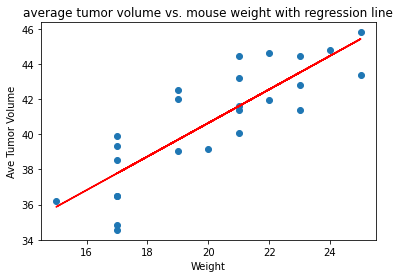

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

X = capo_weight_df.loc[:,'Weight (g)'].values.reshape(-1, 1)  
Y = capo_weight_df.loc[:,'Tumor Volume (mm3)'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("average tumor volume vs. mouse weight with regression line")
plt.xlabel("Weight")
plt.ylabel("Ave Tumor Volume")
plt.show()

In [22]:
corr = pd.DataFrame(capo_weight_df.corr())
corr = corr.loc['Tumor Volume (mm3)','Weight (g)']
print(f"correlation coefficient of weight vs volume {corr}")

correlation coefficient of weight vs volume 0.8419363424694722
